# EDA To Prediction(DieTanic)

Contents of the Notebook:  
  
**Part1: Exploratory Data Analysis(EDA):**  
1) Analysis of the features.  
2) Finding any relations or trends considering multiple features.  
  
  
**Part2: Feature Engineering and Data Cleaning:**  
1) Adding any few features.  
2) Removing redundant features  
3) Converting features into suitable form for modeling.  
  
  
**Part3: Predictive Modeling**  
1) Running Basic Algorithms.  
2) Cross Validation.  
3) Ensembling.  
4) important Features Extraction.

## Part1: Emploratory Data Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('C:\\Users\\신태경\\KaggleStudy\\Titanic\\train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() # checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The Age, Cabin and Emvarked habe null values. i will try to fix them.  
How many survived?

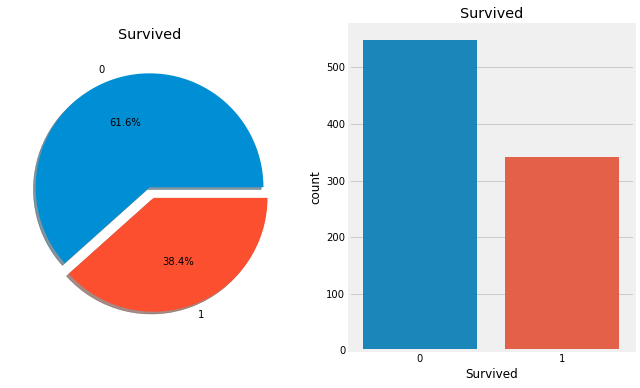

In [5]:
f, ax = plt.subplots(1,2,figsize=(10,6))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

It is evident that not many passengers survived the accident.  
Out of 891 passengers in training set, only around 350 survived. i.e Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.  
  
we will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of Embarcation, Age, etc.  
  
Fitst let us understand the different types of features.

### Types Of Features
  
**Categorical Features:**  
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them. For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.  
**Categorical Features in the dataset: Sex, Embarked.**  
  
**Ordinal Features:**  
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: if hava a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.  
**Ordinal Features in the dataset: PClass**  
  
**Continous Feature:**  
A Feature is said to be continous if it can take values between any two points or between minimum or maximum values in the features column.  
**Continous Features in the dataset: Age**

### Analysing The Features

**Sex -> Categirical Feature**

In [6]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

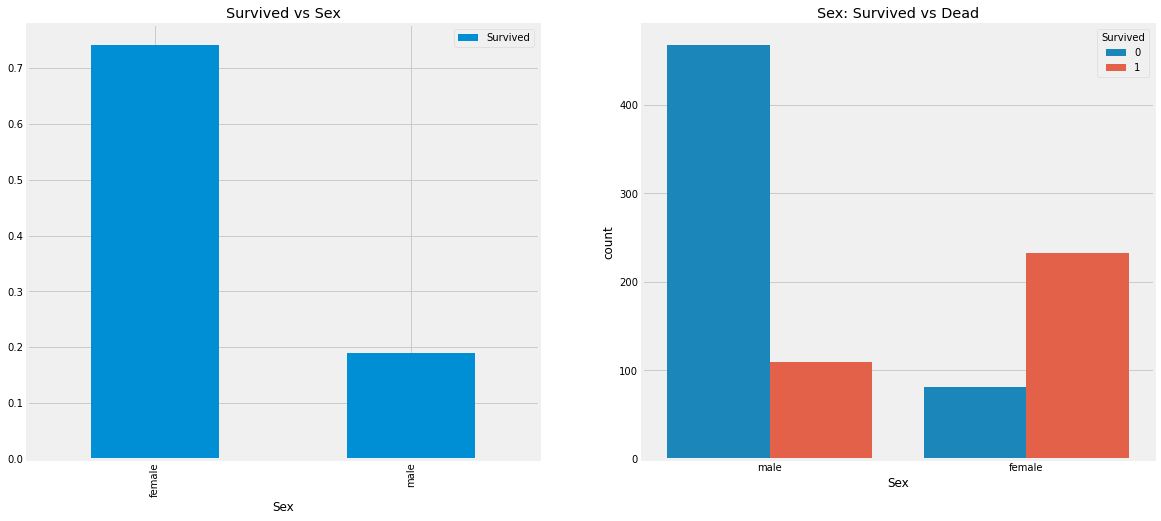

In [7]:
f, ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a women on the ship is around 75% while that for men in around 18-19%.

This looks to be a very important feature for modeling. But is it the best? Lets check other features.

**Pclass -> Ordinal Feature**

In [8]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


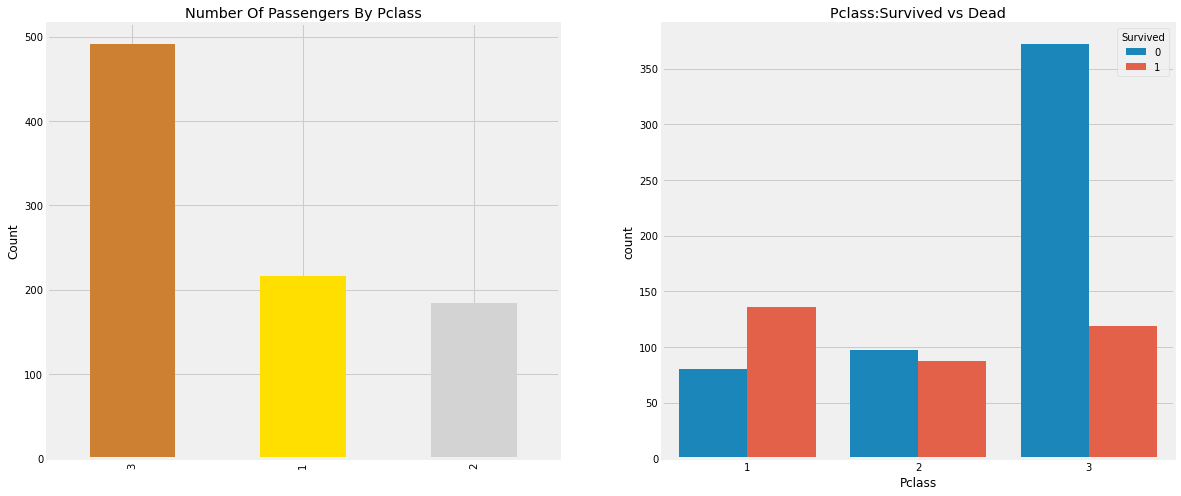

In [9]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

People say Money Can't Buy Everything. But we can clearly see that Passengers Of Pclass 1 were given a very high priority while rescue. Even though the the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.  
  
For Pclass 1% survived is around 63% while for Pclass 2 is around 48%. So money and status matters. Such a materialistic world.  
  
Lets Dive in little bit more and check for other interesting observations. Lets check survival rate with Sex and Pclass Together.

In [10]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

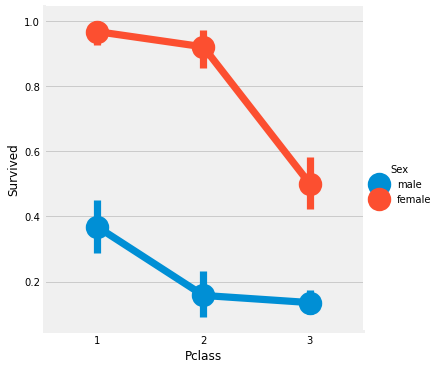

In [11]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

We use FactorPlot in this case, because they make the seperation of categorical values easy.  
  
Looking at the CrossTab and the FactorPlot, we can easily infer that survival for Women from Pclass1 is about 95-96%, as only 3 out of 94 Women from Pclass died.  
  
It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.  
  
Looks like Pclass is also an important feature. Lets analyse other features.

**Age -> Continous Feature**

In [12]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


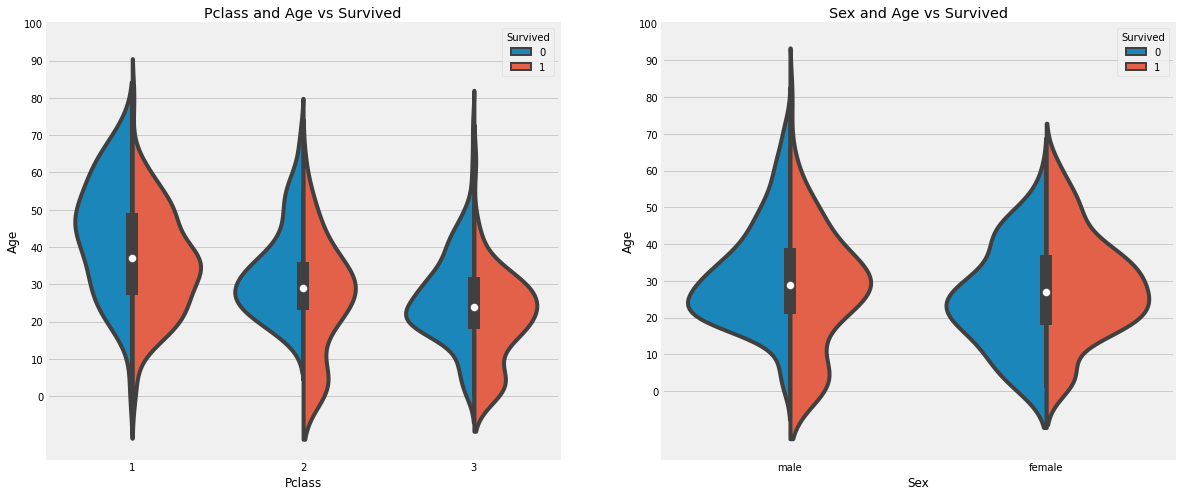

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

**Observations:**
1) The number of children increases with Pclass and the survival rate for passengers below Age10(i.e children) looks to be good irrespective of the Pclass.  
  
2) Survival chances for Passengers aged 20-50 from Pclass1 is high and is even better for Women.  
  
3) For males, the survival chances decreases with an increase in age.

as we had seen earlier, the Age feature has 177 null values. To replace these NaN values, we can assign them the mean age of the dataset.  
  
But the problem is, there were many people with many different ages. we just cant assign a 4 year kid wigh the mean age that is 29 years. is there any way to find out what age-band does the passenger lie?  
  
we can check the Name feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.

In [14]:
# 컬럼 새로 만들어주기
data['Initial'] = 0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') # lets extract the Salutations

so here we are using the Regex: [A-Za-z]+).. So what it does is, it looks for strings which lie between A-Z or a-z and followed by a .(dot) so we successfully extract the initials from the Name.

In [15]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r') # Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


there are some misspelled Initials like Mlle or Mme that stand for Miss. i will replace them with Miss and same thing for other values.

In [16]:
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'], ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True)

In [17]:
data.groupby('Initial')['Age'].mean() # check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

Filling NaN Ages

In [18]:
## Assigning the NaN values with the Ceil values of the mean anges
data.loc[(data.Age.isnull())&(data.Initial=='Mr'), 'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'), 'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'), 'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'), 'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'), 'Age']=46

In [19]:
data.Age.isnull().value_counts() # no null values

False    891
Name: Age, dtype: int64

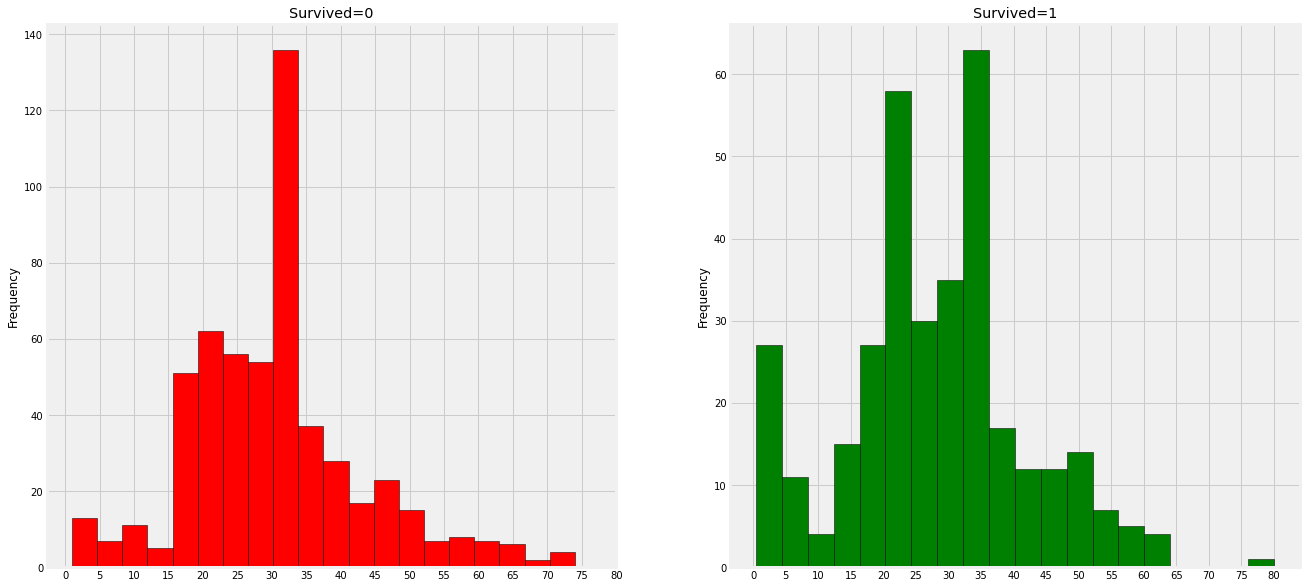

In [20]:
f, ax = plt.subplots(1, 2, figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived=0')
x1=list(range(0, 85, 5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived=1')
x2=list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

obsercations:  
1) The Toddelers(age<5) were saved in large numbers(The Women and Child First Policy).  
2) The oldest Passenger was saved(80 years.)  
3) Maximum number of deaths were in the age group of 30-40

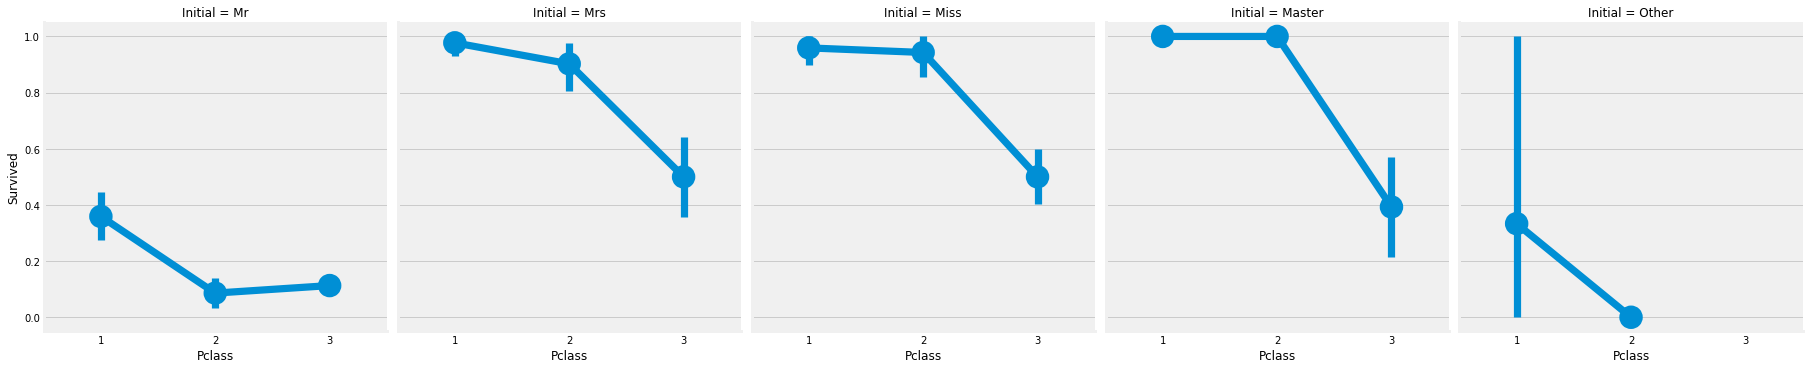

In [21]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

The Women and Child first policy thus holds true irrespective of the class.

**Embarcked -> Categorical Value**

In [22]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

Chances for survival by Port Of Embarkation

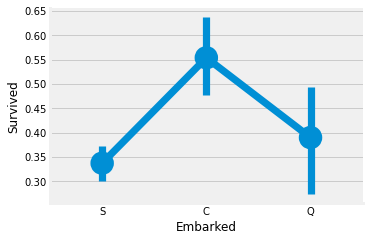

In [23]:
sns.factorplot('Embarked', 'Survived', data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

The chances for survival for Port C is hihgest around 0.55 while it is loweast for S.

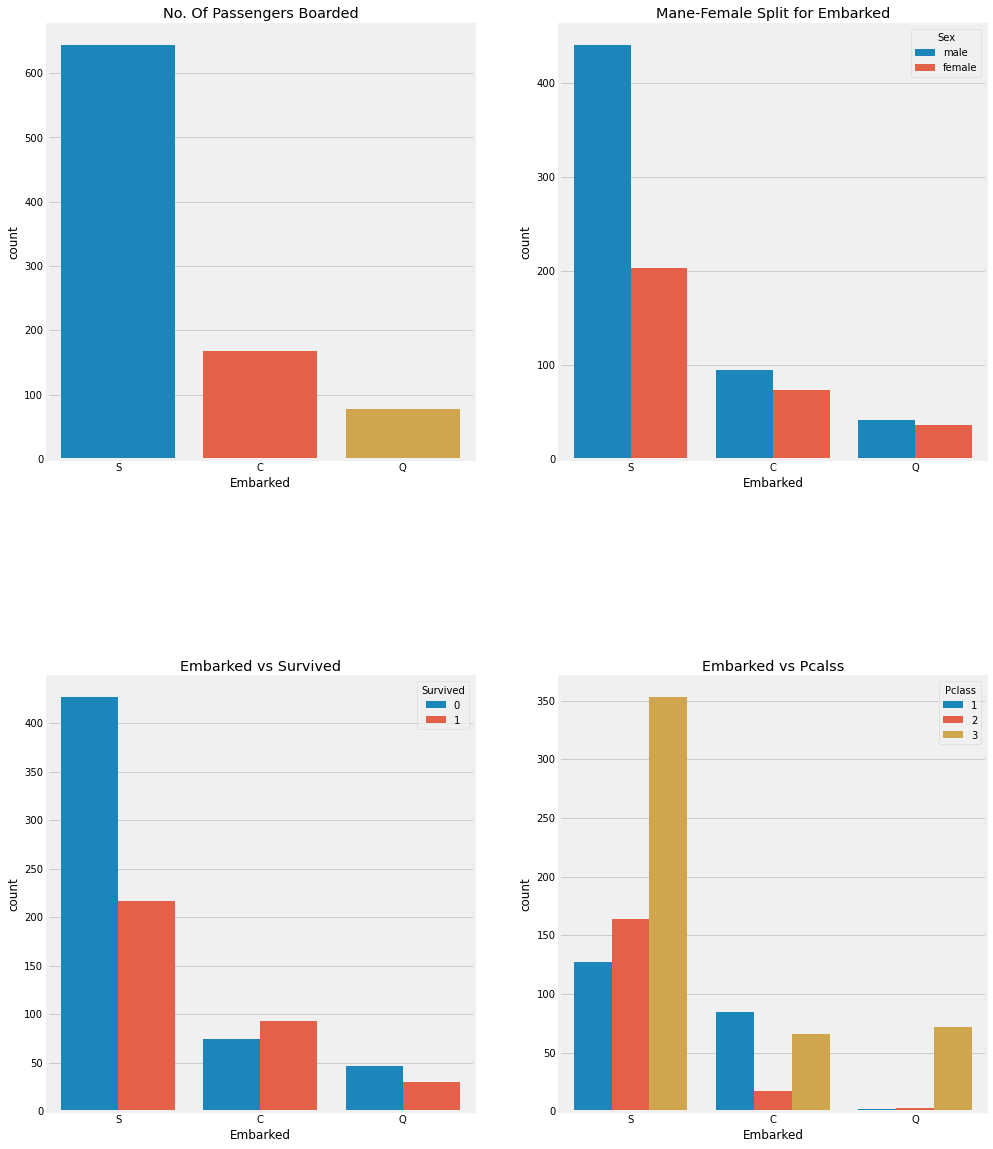

In [24]:
f,ax=plt.subplots(2,2,figsize=(15,20))
sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Mane-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pcalss')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Observations:  
1) Maximum passengers boarded from S. Majority of them being from Pclass3.  
2) The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers.  
3) The Embark S look to the port from where majority the rich people boarded. Still the chances for survival is low there, that is because many passengers from Pclass3 around 81% didnt't survive.  
4) Port Q had almost 95% of the passengers were from Pclass3.

<function matplotlib.pyplot.show(close=None, block=None)>

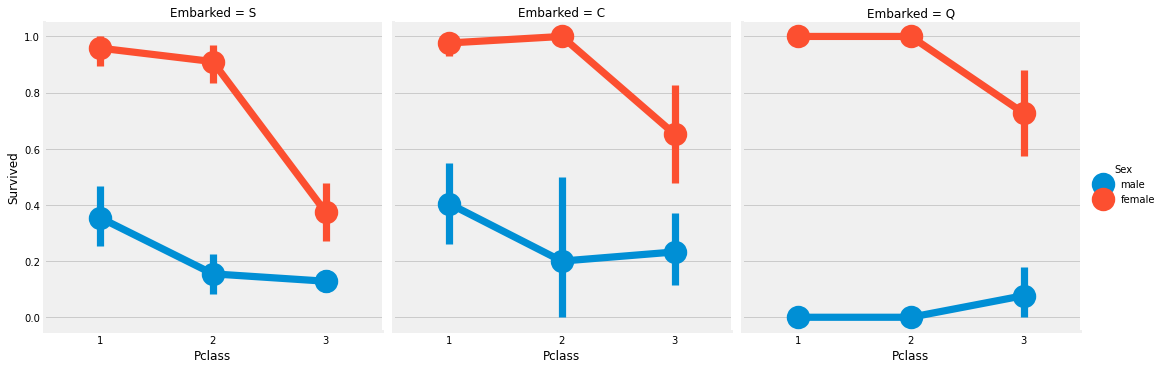

In [25]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show

observations:  
1) The survival chances are almose 1 for women for Pclass1 and Pclass2 irrespective of the Pclass.  
2) Port S looks to be very unlucky for Pclass3 Passengers as the survival rate for both men and women is very los.(Money Matters)  
3) Port Q looks to be unluckiest for Men, as almost all were from Pcalss3.

**Filling Embarked NaN**

In [26]:
data['Embarked'].fillna('S', inplace=True)

In [27]:
data['Embarked'].isnull().any() # Finally no NaN values

False

**SibSip -> Discrete Feature**

This feature represents whether a person is alone or with his family members.  
sibling = brother, sister, stepbrother, stepsister  
spouse = husband, wife

In [28]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


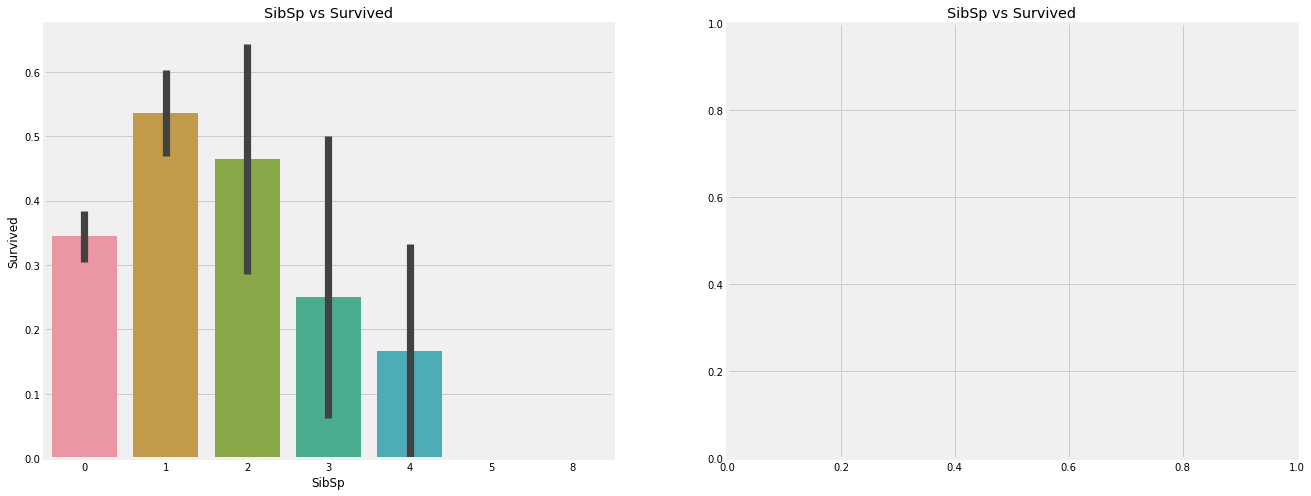

In [29]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [30]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


**Observations::**  
The barplot and factorplot shows that if a passenger is alone onboard with no siblings, he have 34.5% survival rate. The graph roughly decreases if the number of siblings increase. That is, if i have a family on board, i will try to save them instead of saving myself first. Surprisingly the survival for families with 5-8 members is 0%. The reason may be Pclass?  
  
The reason is Pclass. The crosstab shows that Person with SibSp>3 were all in Pclass3. It is imminent that all the large families is Pclass3(>3) died.

**Parch**

In [31]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


The crosstab again shows that larger families were in Pclass3.

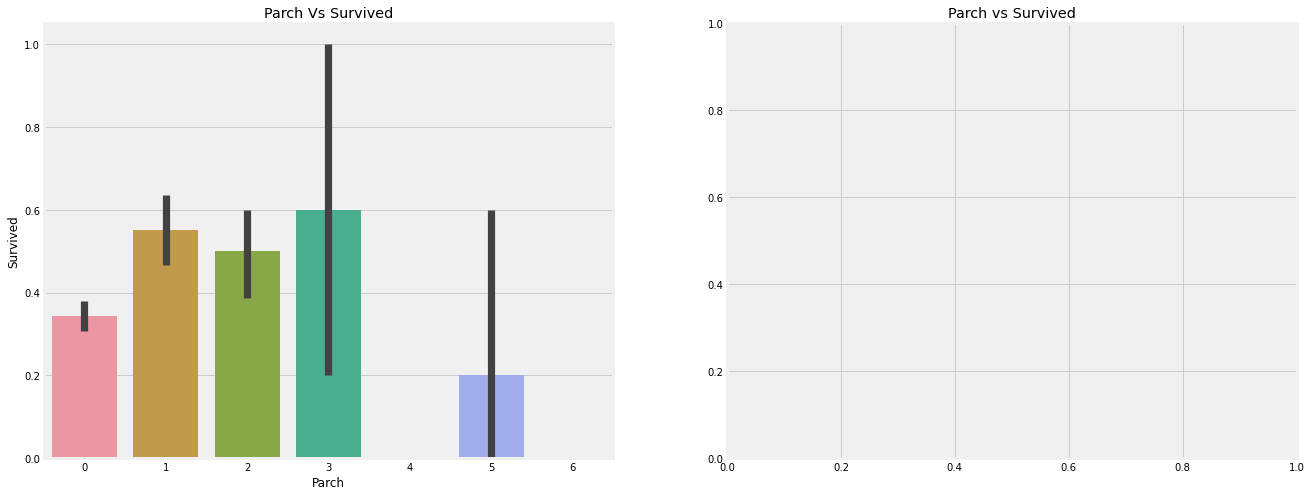

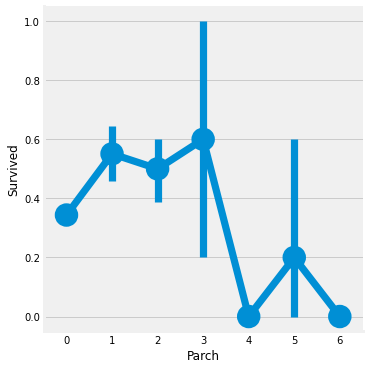

In [32]:
f, ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch Vs Survived')

sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.show(2)
plt.show()

**Observations:**
Here too the results are quite similar. Pssengers with their parents onboard have greater chance of survial. It however reduces as the number goes up.  
  
The chances of survival is good for somebody who has 1-3 parents on the ship. Being aling also proves to be fatal the chances for survival decreases whem somebody has >4 parents on the ship.

**Fare -> Continous Feature**

In [33]:
print("Highest Fare was:", data['Fare'].max())
print("lowest Fare was:", data['Fare'].min())
print("Average Fare was:", data['Fare'].mean())

Highest Fare was: 512.3292
lowest Fare was: 0.0
Average Fare was: 32.2042079685746


The lowest fare is 0.0.

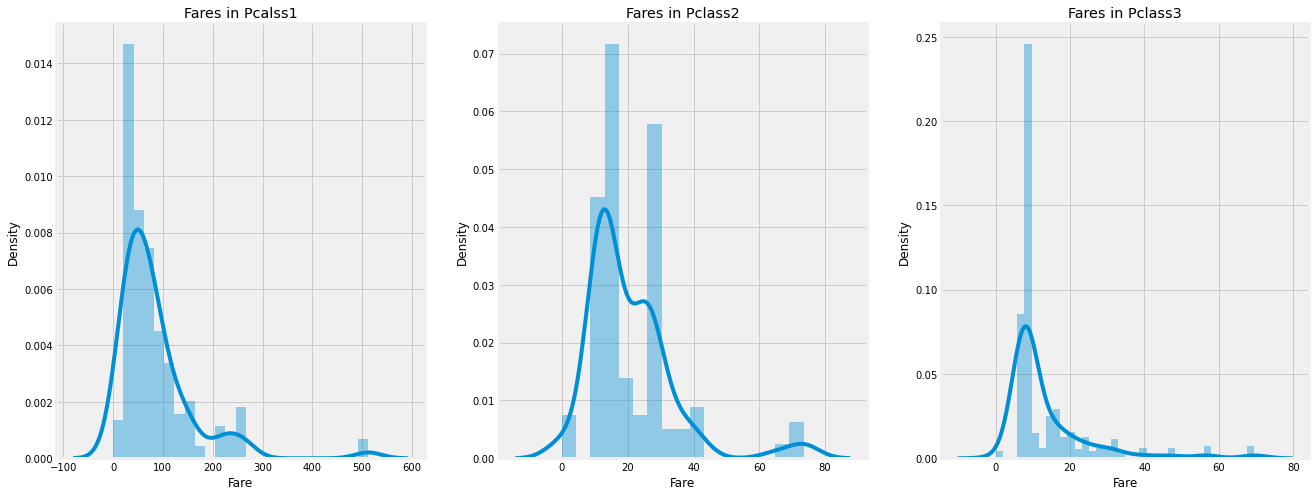

In [34]:
f, ax = plt.subplots(1, 3, figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pcalss1')

sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass2')

sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass3')
plt.show()

There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on decreasing as the standards reduces. As this is also continous, we can convert into discrete values by using binning.

**Observations in a Nutshell for all features:**
Sex: The chance of survival for women is high as compared to men.  
  
Pclass: There is a visible trend that veing a 1st class passenger gives you better chances of survival. The survival rate for Pclass3 is very low. For women, the chance of survival from Pclass1 is almost 1 and is high too for those from Pclass2.  
  
Age: Children less than 5-10 years do have a high chance of survival. Passegers between age group 15 to 35 died a lot.  
  
Embarked: This is a very interesting feature. The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got ip at S. Passengers at Q were all from Pclass3.  
  
Parch+SibSp: Having 1-2 siblings, spouse on board or 1-3 Parents shows a greater chance of probability rather than being alone or having a large familty travelling with you.

### Correlation Between The Features

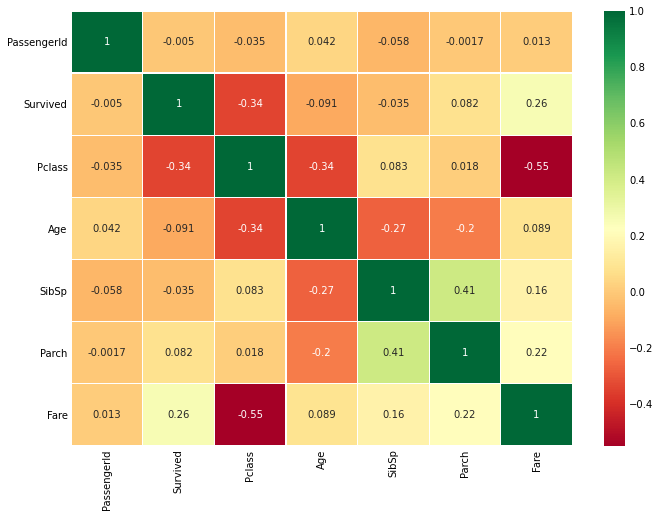

In [35]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2) # data.corr() --> correlation matrix
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

**Interpreting The Heatmap**
The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings, Before understanding the plot, let us see what exactly correlation is.  
  
POSITIVE CORRELATION: if an incease in feature A leads to increase in featureB, then they are positively correlated. A value 1 means perfect positive correlation.  
  
NEGATIVE CORRELATION: if an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.  
  
Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This mean that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of  them contains almost the same information.  
  
So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap, we can see that the features are not much correlated. This highest correlation is between SibSp and Parch i.e 0.41. So we can carry on with all features.

## Part2: Feature Engineering and Data Cleaning
Now what is Feature Engineering?  
Whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe many redundant features which should be eliminated. Also we can get or add new features by obseving or extracting information from other features.  
An example would be getting the Initials feature using the Name Feature. Lets see if we can get any new features and eliminate a few. Also we will transform the existing relevant features to suitable from tor Predictive Modeling.

### Age Band
Problem With Age Feature:  
As i have mentioned ealier that Age is a continous feature, there is a problem with Continous Variabels in Machine Learning Models.  
  
Eg: if i say to group or arrange Sports Person by Sex, We can easily segregate them by Male and Female.  
  
Now if i say to group them by their Agem then how would you do it? if there are 30 Persons, there may be 30 age values. Now this is problematic. 
  
we need to convert these continous values into categorical values by either Binning or Normalisation. i will be using binning. i.e group a range of ages into a single bin or assign them a single value.  
  
Okay so the maximum age of a passenger was 80. So lets dvide the range from 0-80 into 5 bins. So 80/5=16. So bins if size 16.

In [36]:
data['Age_band']=0
data.loc[data['Age']<=16, 'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32), 'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48), 'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64), 'Age_band']=3
data.loc[data['Age']>64, 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [37]:
# checking the number of passengers in each band
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


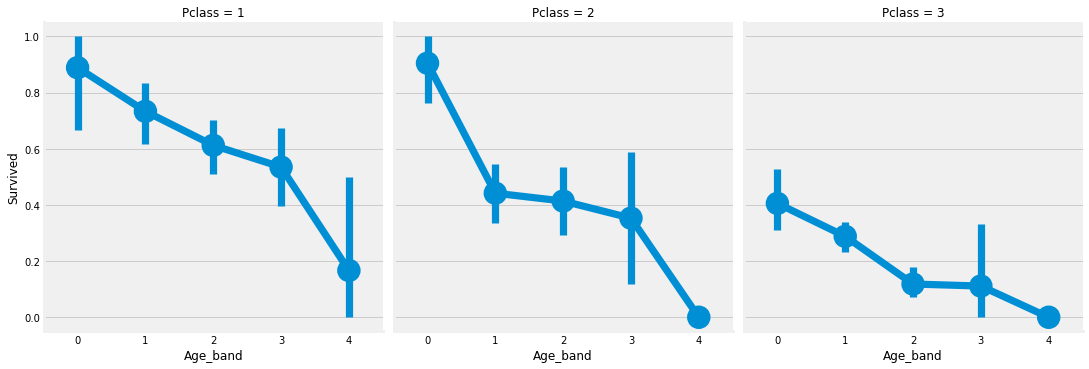

In [38]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

the survival rate decreases as the age increases irrespective of the Pclass.

### Family_Size and Alone
At this point, we can create a new feature called "Family_size" and "Alone" and analyse it. This feature is the summation of Parch and SibSp. it gives us a combined data so that we can check if survival rate have anything to do with family size of the passengers. Alone will denote whther a passenger is alone or not

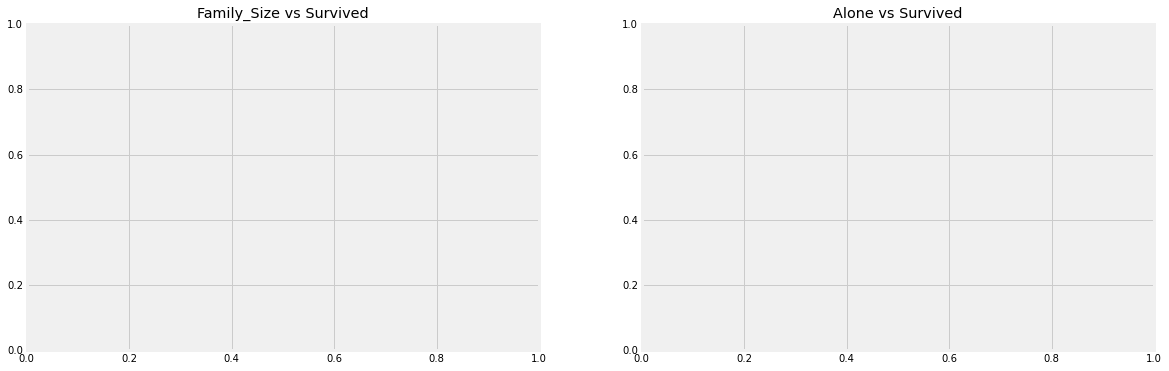

In [39]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp'] # Family size
data['Alone']=0
data.loc[data.Family_Size==0, 'Alone']=1 # Alone

f,ax = plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

Family_Size=0 means that the passenger is alone. Clearly, if you are alone of family_size=0, then chances for survival is very low. For family size>4, the chances decrease too. This also looks to be an important feature for the model. Lets examine this furthur.

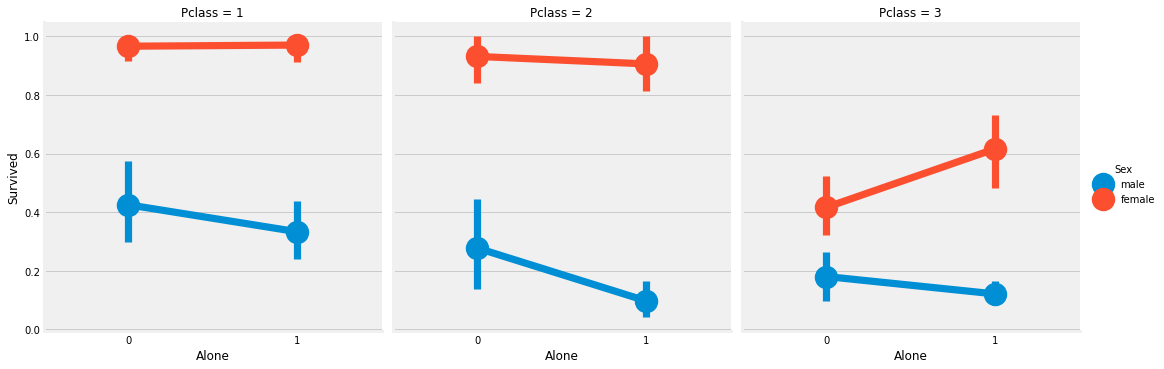

In [40]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

In [41]:
plt.savefig('test.png')

<Figure size 432x288 with 0 Axes>

It is visible that being alone is farmful irrespective of Sex or Pclass except for Pclass3 there the chances of females who are alone is high than those with family

### Fare_Range
Since fare is also a continous feature, we need to convert it into ordinal value. For this we will use pandas.qcut.  
So what qcut does is it splits or arranges the values according the number of bins we have passed. So if we pass for 5 bins, It will arrange the values equally spaced into 5 seperate bins or value ranges.

In [42]:
data['Fare_Range']=pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


As discussed above, we can clearly see that the fare_range increases, the chances of survival increases.  
Now we cannot pass the Fare_Range values as it is. We should convert it into singleton values same as we did in Age_Band

In [43]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91, 'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<14.454), 'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<31), 'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<513), 'Fare_cat']=3

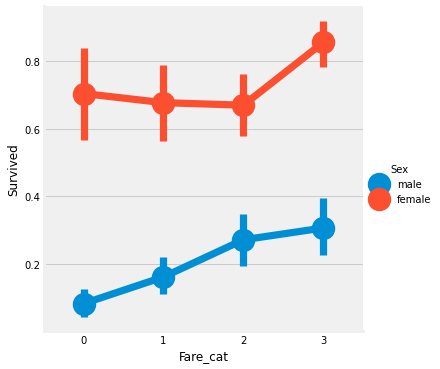

In [44]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

Clearly, as the Fare_cat increases, the survival chances increases. This feature may become an important feature during modeling along with the Sex.

### Converting Srting Values into Numeric
Since we cannot pass strings to a machine learning model, we need to convert features like Sex, Embarked, etc into numeric values.

In [45]:
data['Sex'].replace(['male', 'female'], [0,1], inplace=True)
data['Embarked'].replace(['S','C','Q'], [0,1,2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0,1,2,3,4], inplace=True)

In [46]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,2,0,1,"(7.91, 14.454]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0,4,1,0,1,"(7.91, 14.454]",1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0,2,1,0,1,"(14.454, 31.0]",2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,22.0,1,2,W./C. 6607,23.4500,NaN,0,2,1,3,0,"(14.454, 31.0]",2
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1,0,1,0,1,"(14.454, 31.0]",2


Dropping UnNeeded Features  
  
Name -> We don't need name feature as it cannot be converted into any categorical value.  
  
Age -> We have the Age_band feature, so no need of this.  
  
Ticket -> It is any random string that cannot be categorised.  
  
Fare -> We have the Fate_cat feature, So nunneeded  
  
Cabin -> A lot of NaN values and also many passengers have multiple cabins. so this is a useless feature.  
  
Fare_Range -> We have fare_cat feature.

PassengerId -> Cannot be categorised.

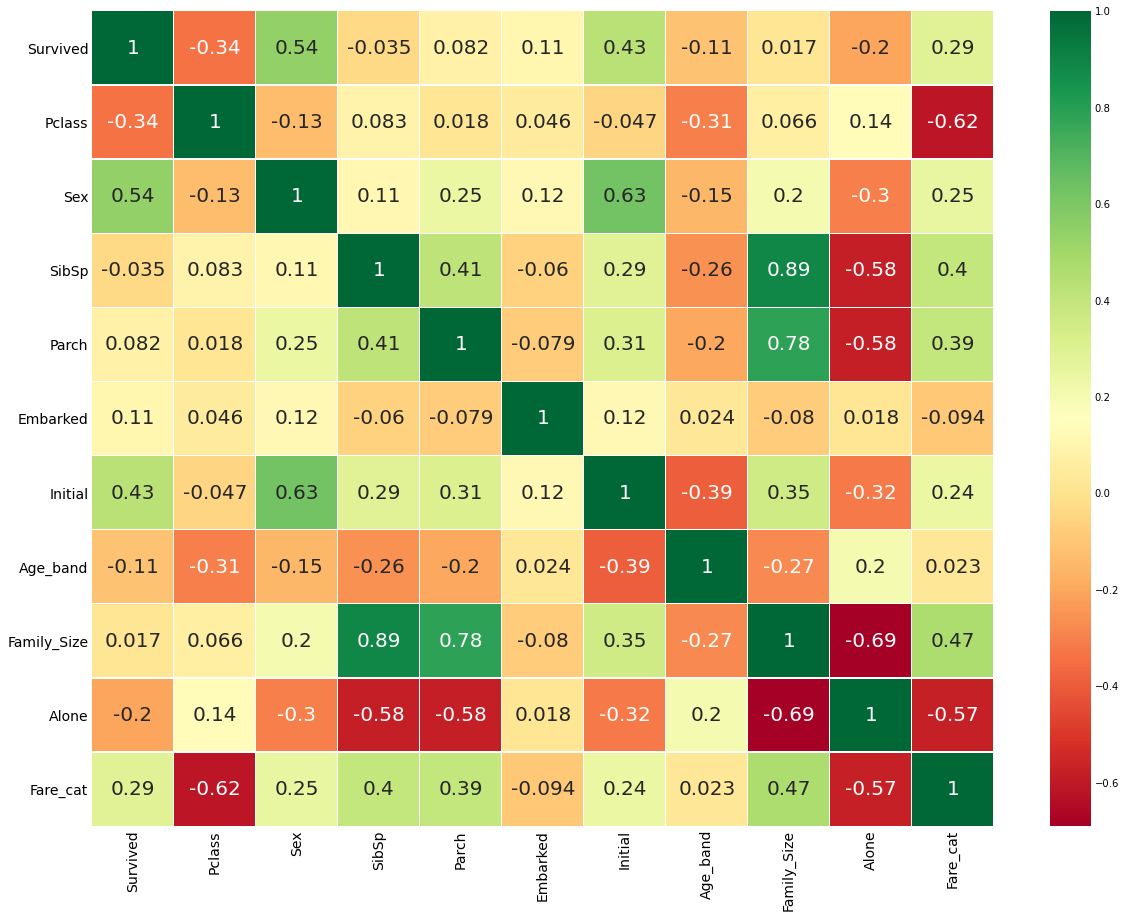

In [47]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidth=0.2, annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Now the above correlation plot, we can see some positively related features. Some of them being SibSp and Family_size and Parch and Family_Size and some gefative ones like Alone and Family_Size.

## Part3: Predictive Modeling
we have gained some insights from the EDA part. But with that, we cannot accurately predict or tell whether a passenger will survive or die. So now we will predict the whether the Passenger will survive or not using some great Classification Algorithms. Following are the algorithms i will use to make the model:  
  
1) Logistic Regression
  
2) Support Vector Machines(Linear and radial)  
  
3) Random Forest  
  
4) K-Nearest Neighbours  
  
5) Naive Bayes  
  
6) Decision Tree  
  
7) Logistic Regression

In [48]:
# importing all the required NM packages
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [49]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

stratify=data['Survived']를 해줌으로써 해당 데이터의 비율이 고르게 선정될 수 있도록 만들어 줍니다.

**Radial Support Vector Machines(rbf-SVM)**

**C(Cost)**  
decision boundary와 margin의 간격을 어느 정도로 할 것인지 결정.  
Cost가 적으면 margin이 넓어지는데, 이에 따라서 train-error가 생길 확률이 높다.  
Cost가 높은 경우 decision boundary와 margin이 좁아진다. 따라서 error가 적어질 수 있지만 train시 보지 못한 데이터에 대해서 분류가 잘못될 확률이 높다.

**gamma**  
train data 하나당 영향을 끼치는 범위를 조절하는 변수. gamma가 적으면 영향을 끼치는 범위가 넓고, 높으면 영향을 끼치는 범위가 매우 줄어들게 된다.

In [50]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


**Linear Support Vector Machine(linear-SVM)**

In [51]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is:', metrics.accuracy_score(test_Y, prediction2))

Accuracy for linear SVM is: 0.8171641791044776


**Logistic Regression**

In [52]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is:', metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logistic Regression is: 0.8134328358208955


**Decision Tree**

In [53]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8059701492537313


**K-Nearest Neighbours(KNN)**

In [54]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8283582089552238


Now the accuracy for the KNN model changes as we change the values for n_neighbours attribute. The default value is 5. Lets check the accuracies over various values of n_neighbours.

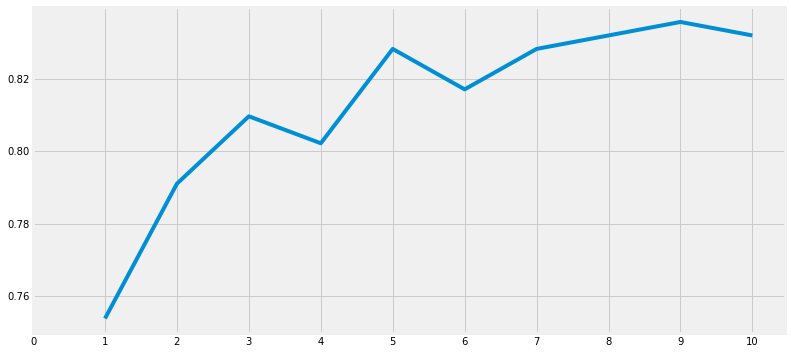

Accuracies for different values of n are: [0.75373134 0.79104478 0.80970149 0.80223881 0.82835821 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [55]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:', a.values, 'with the max value as ', a.values.max())

**Gaussian Naive Bayes**

In [56]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


**Random Forests**

In [57]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7=model.predict(test_X)
print('The Accuracy of the Random Forests is', metrics.accuracy_score(prediction7, test_Y))

The Accuracy of the Random Forests is 0.8097014925373134


The accuracy of a model is not the only factor that determines the robustness of the classifier. Let's say that a classifier is trained over a training data and tested over the test data and it scores an accuracy of 90%.  
  
Now this seems to be very good accuracy for a classifier, but can we confirm that it will be 90% for all the new test sets that come over? The answer is No. because we can't determine which all instances will the classifier will use to train itself. As the training and testing data changes, the accuracy will also change. It may increase or decrease. This is known as model variance.  
  
To overcome this and get a generalized model, we use Cross Validation.

### Cross Validation
many a times, the data is imbalanced, i.e there may be a high number of class1 instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset.  
  
1) The F-Fold Cross Validation works by first dividing the dataset into k-subsets.  
  
2) Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.  
  
3) we continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm.  
  
This is called K-Fold Cross Validation.  
  
4) An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model.

In [58]:
from sklearn.model_selection import KFold # for K-fold cross validation
from sklearn.model_selection import cross_val_score # score evaluation
from sklearn.model_selection import cross_val_predict # prediction
kfold = KFold(n_splits=10, random_state=22, shuffle=True) #k=10, split the data into 1- equal parts
xyz=[]
accuracy = []
std = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold, scoring="accuracy")
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz, 'Std':std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.785730,0.059693
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.811511,0.048862
Decision Tree,0.808115,0.050954
Naive Bayes,0.795843,0.054861
Random Forest,0.814869,0.050305


<AxesSubplot:>

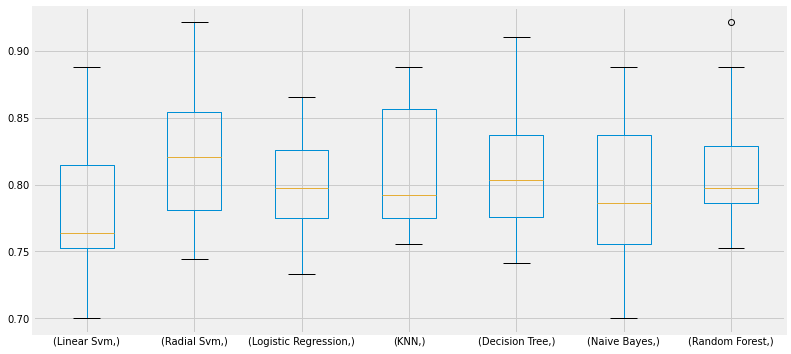

In [60]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

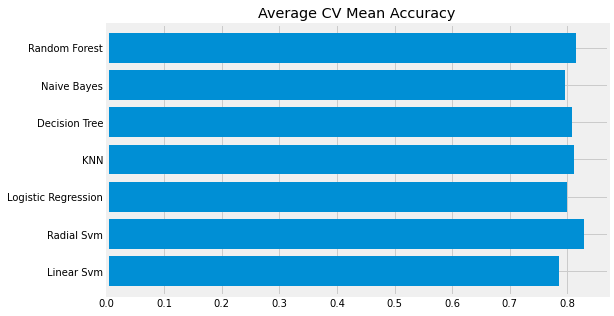

In [63]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

The classification accuracy can be sometimes misleading due to imbalance. We can get a summarized result with the help of confusion matrix, which shows where did the model go wrong, or which class did the model predict wrong.

### Confusion Matrix
it gives the number of correct and incorrect classifications made by the classifier

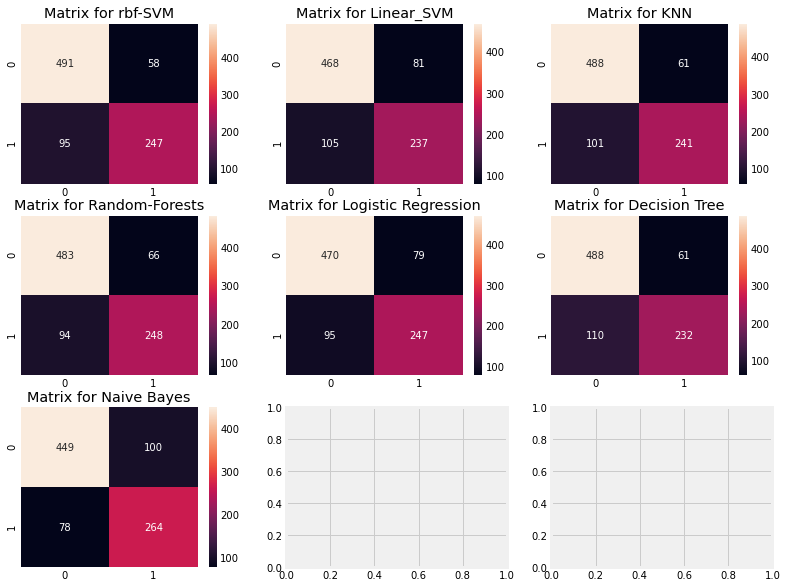

In [66]:
f, ax = plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for Linear_SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

**interpreting Confusion Matrix**
The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong predictions made. Lets consider the first plot for rbf-SVM:  
  
1) The no. of correct predictions are 491(for dead) + 247(for survived) with the mean CV accuracy being (491+247)/891 = 82.8% which we did get earlier.  
  
2) Errors-> Wrongly Classified 58 dead people as survived and 95 survived as dead. Thus it has made more mistakes by predicting dead as survived.

By looking at all the matrices, we can say that rbf-SVM has a higher chance in correctly predicting dead passengers but NaiveBayes has a higher chance in correctly predicting passengers who survived.

**Hyper-Parameters-Tuning**
The machine learning models are like ad Black Box. There are some default parameter values for this Black-Box, which we can tune or change to get a better model. Like the C and gamma in the SVM model and similarly different parameters for different classifiers, are called the hyper-parameters, which we can tune to change the learning rate of the algorithm and get a better model. This is known as Hyper-Parameter Tuning.  
  
we will tune the hyper-parameters for the 2 best classifiers i.e the SVM and Randomforests.

**SVM**

In [71]:
from sklearn.model_selection import GridSearchCV
C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf', 'linear']
hyper={'kernel':kernel, 'C':C, 'gamma':gamma}
gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.6, gamma=0.1)


**Random Forests**

In [73]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8204381394764925
RandomForestClassifier(n_estimators=900, random_state=0)


The best score for Rbf-Svm is 82.82% with C=0,.6, gamma=0.1. For RandomForest, score is abt 82% with n_estimators=900.

### Ensembling
Ensenbling is a good way to increase the accuracy or performance of a model. in simple words, it is the combination of various simple models to create a single powerful model.  
  
Lets sat we want to buy a phone and ask many people about it based on various parameters. So then we can make a strong judgement about a single product after analysing all different parameters. This is Ensembling, which improves the stability of the model. Ensembling can be done in ways like:  
1) Voting Classifier  
2) Bagging  
3) Boosting

**Voting Classifier**  
It is simplest way of combining predictions from many different simple machine learning models. It gives an average prediction result based on the prediction of all the submodels. The submodels or the basemodels are all of different types.

In [76]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                               ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),
                                               ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)),
                                               ('LR', LogisticRegression(C=0.05)),
                                               ('DT', DecisionTreeClassifier(random_state=0)),
                                               ('NB', GaussianNB()),
                                               ('svm', svm.SVC(kernel='linear', probability=True))
                                               ],
                                    voting='soft').fit(train_X, train_Y)

print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(test_X,test_Y))
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring="accuracy")
print('The cross validated score is', cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8249188514357053


**Bagging**  
Bagging is a general ensemble method. It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions. Due to the averaging, there is reduction in variance. Unlike Voting Classifier, Bagging makes use of similar classifiers.

Bagged NMM  
Bagging works best with models with high variance. An example for this can be Decision Tree or Random Forests. We can use KNN with small value of n_neighbours, as small value of n_neighbours.

In [77]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model,X,Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is:', result.mean())

The accuracy for bagged KNN is: 0.835820895522388
The cross validated score for bagged KNN is: 0.8182896379525593


Bagged DecisionTree

In [78]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:', result.mean())

The accuracy for bagged Decision Tree is: 0.8246268656716418
The cross validated score for bagged Decision Tree is: 0.8227715355805243


**Boosting**  
Boosting is an ensembling technique which uses sequential learning of classifiers. It is a step by step enhancement of a weak model. Boosting works as follows:  
A model is first trained on the complete dataset. Now the model will get some instances right while some wrong. Now in the next iteration, the learner will focus more on the wrongly predicted instances or give more weight to it. Thus it will try to predict the wrong instance correctly. Now this iterative process continous, and new classifiers are added to the model untill the limit is reached on the accuracy.

AdaBoost(Adaptive Boosting)  
The weak learner or estimator in this case is a Decision Tree. But we can change the default base_estimator to any algorithm of our choice.

In [81]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is:', result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


Stochastic Gradient Boosting  
Here too the weak learner is a Decision Tree.

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result=cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is:', result.mean())

The cross validated score for Gradient Boosting is: 0.8160299625468165


**XGBoost**

In [87]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result=cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:', result.mean())

[22:25:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:25:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:25:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:25:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

We got the highest accuracy for AdaBoost. we will try to increase it with Hyper-Parameter Tuning

**Hyper-Parameter Tuning for AdaBoost**

In [90]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper={'n_estimators': n_estimators, 'learning_rate': learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8260184545853996
AdaBoostClassifier(learning_rate=0.05, n_estimators=200)


The accuracy we get with AdaBoost is 82.60% with n_estimators200 and learning_rate0.05

**Confusion Matrix for the Model**

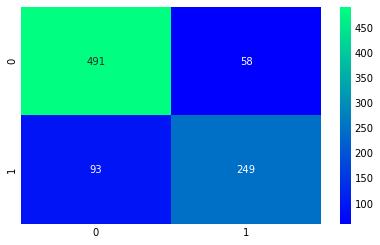

In [92]:
ada=AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
result=cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

### Feature Importance

[22:52:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


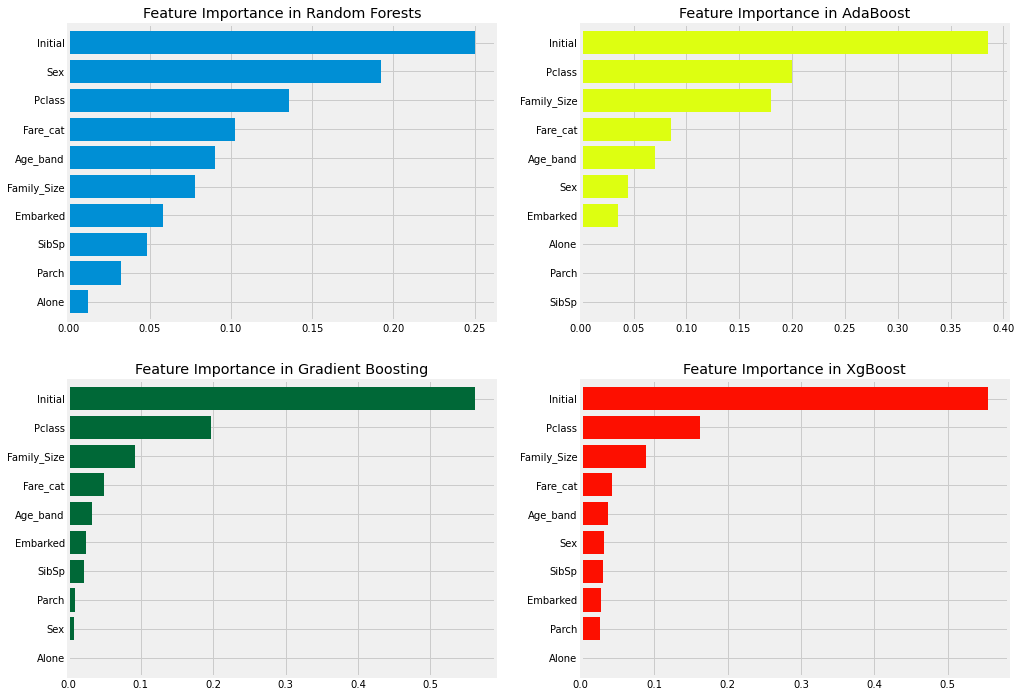

In [95]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

We can see the important features for various classifiers like RandomForests, AdaBoost, etc.

**Observations:**  
1) Some of the common important features are initial, Fare_cat, Pclass, Family_Size.  
  
2) The Sex Feature doesn't seem to give importances in some model, which is shocking as we had seen earlier that Sex combined with Pclass was giving a very good differentiating factor. Sex looks to be important only RandomForests.  
  
However, we can see the feature Initial, which is at the top in many classifiers. We had already seen the positive correlation between Sex and Initial, so they both refer to the gender.  
  
3) Similarly the Pclass and Fare_cat refer to the status of the passengers and Family_Size with Alone, Parch and SibSp.